Using code from  https://github.com/studywolf/pydmps for dmps

(-0.1, 1.1)

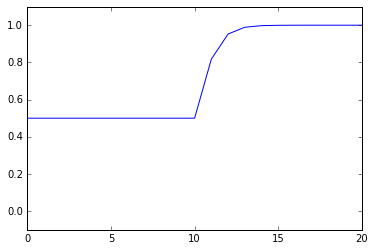

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

import pydmps.dmp_discrete as DMP

# trajectory to be learned
path = np.linspace(0,1,21)
path = 0.5 + np.maximum(0,np.tanh(15*(path-.5)))/2.0

pl.plot(path)
pl.ylim([-.1,1.1])

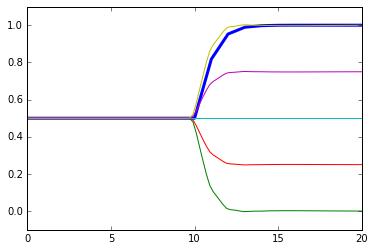

In [68]:
# number of basis functions
points = 1000

# init a single dmp. We use the first and last point of the
# trajectory as the starting point and the goal
dmp = DMP.DMPs_discrete(dmps=1, bfs=points, y0=path[0], goal=path[-1])
# compute the weights
dmp.imitate_path(y_des=path)

# plot the desired trajectory when goal is 1
pl.plot(path, linewidth=3)

# iterate goals from 0 to 1
for goal in np.linspace(0,1,5):
    
    # change goal
    dmp.goal[0] = goal
    # run the dmp. Returns trajectory, speed and acceleration
    y_track,dy_track,ddy_track = dmp.rollout()
    
    pl.plot(np.linspace(0,20,100),y_track)
    pl.ylim([-.1,1.1])
